In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
helix = pd.read_csv('helix_parameters.csv')
helix.head() # just seeing that data was imported properly by outputing first 5 cells

job_n   Energy  n_helices  r0_A  r0_B  r0_C  omega0  delta_omega0_A  \
0  36019 -387.167          3   6.0   6.0   6.0       0               0   
1  36022 -402.606          3   6.0   6.0   6.0       0               0   
2  36020 -395.944          3   6.0   6.0   6.0       0               0   
3  36002 -389.788          3   6.0   6.0   6.0       0               0   
4  36005 -388.016          3   6.0   6.0   6.0       0               0   

   delta_omega0_B  delta_omega0_C  ...   invert_B  invert_C  z1_offset_A  \
0             120             240  ...          1         0            0   
1             120             240  ...          1         0            0   
2             120             240  ...          1         0            0   
3             120             240  ...          1         0            0   
4             120             240  ...          1         0            0   

   z1_offset_B  z1_offset_C  delta_t_A  delta_t_B  delta_t_C     omega1    z1  
0          0.6         -3.0          0          0          0  99.999268  1.51  
1          0.6          0.6          0          0          0  99.999268  1.51  
2          0.6         -1.8          0          0          0  99.999268  1.51  
3         -3.0         -1.8          0          0          0  99.999268  1.51  
4         -3.0          1.8          0          0          0  99.999268  1.51  

[5 rows x 27 columns]

In [3]:
# checking what the columns are
helix.columns

Index([u'job_n', u'Energy', u'n_helices', u'r0_A', u'r0_B', u'r0_C', u'omega0',
       u'delta_omega0_A', u'delta_omega0_B', u'delta_omega0_C', u'z0_offset_A',
       u'z0_offset_B', u'z0_offset_C', u'helix1 phase', u'helix 2 phase',
       u'helix3 phase', u'invert_A', u'invert_B', u'invert_C', u'z1_offset_A',
       u'z1_offset_B', u'z1_offset_C', u'delta_t_A', u'delta_t_B',
       u'delta_t_C', u'omega1', u'z1'],
      dtype='object')

In [4]:
# selecting a couple columns
couple_columns = helix[['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']]
couple_columns.head()

Energy  helix3 phase  helix 2 phase  helix1 phase
0 -387.167             0              0             0
1 -402.606             0              0             0
2 -395.944             0              0             0
3 -389.788             0              0             0
4 -388.016             0              0             0

In [5]:
# selecting same columns a different way
helix.ix[:,['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']].head()

Energy  helix3 phase  helix 2 phase  helix1 phase
0 -387.167             0              0             0
1 -402.606             0              0             0
2 -395.944             0              0             0
3 -389.788             0              0             0
4 -388.016             0              0             0

In [6]:
# Correlations
from pandas.tools.plotting import scatter_matrix

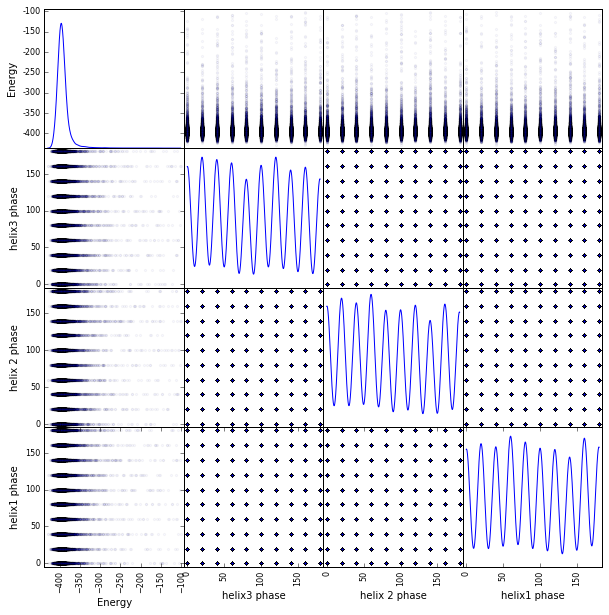

In [7]:
# correlations. you can also have hist on the diagonal
scatter_matrix(couple_columns,alpha=0.03, figsize=(10, 10), diagonal='kde');

In [8]:
# Now Subplots

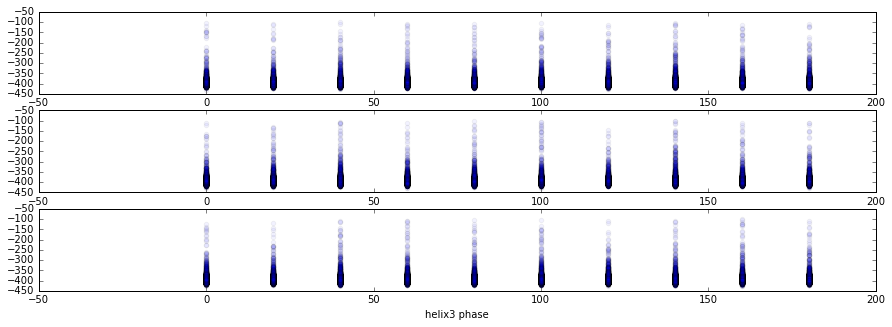

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,5));
#fig.suptitle('Price Variation', size = 15, x = .515, y=1.02)
# 'Energy', 'helix3 phase','helix 2 phase', 'helix1 phase'

axes[0].scatter('helix1 phase', 'Energy', data = couple_columns, alpha = .05);
axes[0].set_xlabel('helix1 phase', fontsize=10);

axes[1].scatter('helix 2 phase', 'Energy', data = couple_columns, alpha = .05);
axes[1].set_xlabel('helix 2 phase', fontsize=10);

axes[2].scatter('helix3 phase', 'Energy', data = couple_columns, alpha = .05);
axes[2].set_xlabel('helix3 phase', fontsize=10);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# c is the variable to color map

# reference for cmap. note cmap and c are different!
# http://matplotlib.org/examples/color/colormaps_reference.html
ax.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], couple_columns[['Energy']], marker='o', c=couple_columns[['Energy']], cmap="RdBu");

ax.set_xlabel('helix1 phase');
ax.set_ylabel('helix 2 phase');
ax.set_zlabel('Energy');

# change view angle 
# http://infamousheelfilcher.blogspot.com/2013/02/changing-viewing-angle-of-matplotlib.html
ax.view_init(azim = 180+40,elev = 10)

In [ ]:
# now filtering data to helix 2 at 100 and helix 0
np.clip(randn(250, 250), -1, 1)

## Was this Cell below what you wanted? 

In [ ]:
# remove the mean for the c
low = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).min()[0]
high = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).max()[0]
plt.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], c=(couple_columns[['Energy']] - couple_columns[['Energy']].mean()), edgecolors='none',vmin = low, vmax = high, cmap = 'Blues')
plt.xlabel('helix1 phase');
plt.ylabel('helix 2 phase');

In [ ]:
low, high

In [ ]:
np.unique(couple_columns[['helix1 phase']].values)

In [ ]:
(couple_columns[['Energy']] - couple_columns[['Energy']].mean()).head()